# MVD 8. cvičení

## 1. část - Vytvoření dat

Použijte stejný kód z minulého cvičení pro vytvoření dat. Navíc vytvořte jeden větší dataset, ve kterém sjednotíte výstupy různých funkcí (např. make_blobs + make_circles). 

In [ ]:
import sklearn.datasets as skds
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [100]:
def vizualise_data(p, labels, cluster_nums: int, centroids=None):
    colors = ['blue', 'red', 'magenta', 'green']
    plt.figure(figsize=(8, 6))

    # Per cluster number
    for cluster in range(cluster_nums):
        # Extract all current cluster samples and plot them
        cluster_p = p[labels == cluster]

        plt.scatter(x=cluster_p[:, 0], y=cluster_p[:, 1], color=colors[cluster], label=str(cluster), s=30, marker='o', alpha=0.8)

    plt.legend(title='label')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.grid(True)
    plt.show()

In [101]:
def create_dataframe(x, y) -> pd.DataFrame:
    dataset = pd.DataFrame(x, columns=['x', 'y'])
    dataset['label'] = y
    dataset['cluster'] = [-1 for _ in range(len(y))]
    return dataset

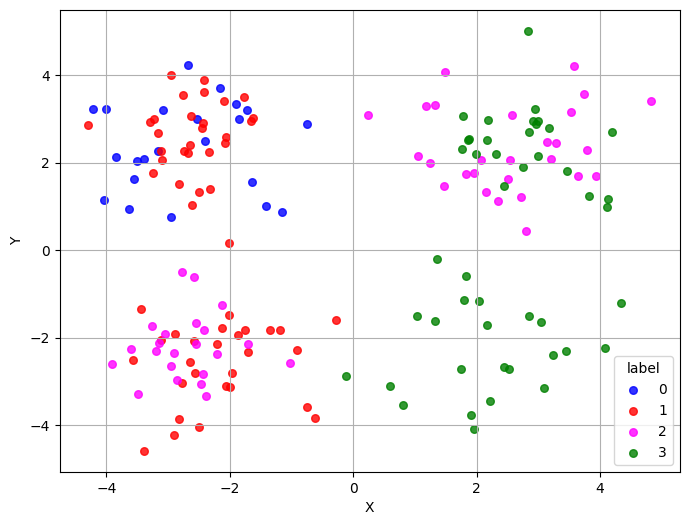

In [102]:
points = []
# 1.
centers = [[5, 5], [5, -5]]
x1, y1 = skds.make_blobs(n_samples=100, centers=centers, random_state=42)
points.append((x1, y1))
# 2.
centers = [[-2.5, 2.5], [-2.5, -2.5], [2.5, 2.5], [2.5, -2.5]]
x2, y2 = skds.make_blobs(n_samples=200, centers=centers, cluster_std=0.7, random_state=42)
points.append((x2, y2))
# 3. 
x3, y3= skds.make_moons(n_samples=200, random_state=42, noise=0.09)
points.append((x3, y3))
# 4
x4, y4 = skds.make_circles(n_samples=200, random_state=42, noise=0.09, factor=0.2)
points.append((x4, y4))
# 5 - mix of 2 and 4
x5, y5 = x2 + x4, y2 + y4
points.append((x5, y5))
vizualise_data(x5, y5, cluster_nums=4)

In [31]:
datasets = []
for x, y in points:
    datasets.append(
        create_dataframe(x, y)
    )
len(datasets)

5

## 2. část - Implementace DBSCAN algoritmu
Dle přednášky implementujte DBSCAN algoritmus.

In [ ]:
# TODO: fix problem with outliers
def DBSCAN(points: np.ndarray, eps: float, min_pts: int):
    """
    @params:
        - points (np.ndarray) - array of points x and y coordinates. Size: (n, 2), where n - number of points, 2 - x and y coords.
        - eps (float) - minimal distances between two points in one cluster.
        - min_pts (int) - minimal number of points
    """
    def euclidean_distance(point1, point2):
        return np.sqrt(np.sum((point1 - point2) ** 2))

    def find_neighbors(point_idx):
        neighbors = []
        for i, point in enumerate(points):
            if euclidean_distance(points[point_idx], point) <= eps:
                neighbors.append(i)
        neighbors.remove(point_idx)
        return neighbors
    
    def expand_cluster(point_idx, neighbors):
        labels[point_idx] = cluster  # label point to cluster
        i = 0
        while i < len(neighbors):
            neighbor_idx = neighbors[i]
            # if point isn't in cluster (-1) or is a noise (0) => add to cluster
            if labels[neighbor_idx] == -1: 
                labels[neighbor_idx] = cluster

            # expand the cluster, if new neighbors were found
            new_neighbors = find_neighbors(neighbor_idx)
            if len(new_neighbors) >= min_pts:
                neighbors += [n for n in new_neighbors if n not in neighbors]
            i += 1
    
    labels = [-1] * len(points)
    # visited = set()
    cluster = 0

    for point_idx in range(len(points)):
        # skip points that are in cluster already and poitns we visited
        if labels[point_idx] != -1:
            continue
        
        neighbors = find_neighbors(point_idx)
        # print(f"{point_idx}: {neighbors}")

        if len(neighbors) < min_pts:
            labels[point_idx] = 0  # label as outlier
        else:
            cluster += 1  # create new cluster
            expand_cluster(point_idx, neighbors)
    
    return labels


## 3. část - Vyhodnocení 
Aplikujte Váš DBSCAN na vytvořené datasety. Experimentálně najděte parametry ```Eps``` a ```MinPts```.

In [246]:
def plot_dbscan_results(dataframe: pd.DataFrame):
    """
    Visualize DBSCAN algorithm results.

    @params:
        - dataframe (pd.DataFrame): DataFrame, that contains 'x', 'y' and 'cluster' columns.
    """
    unique_clusters = sorted(dataframe['cluster'].unique())
    
    colors = ['red', 'blue', 'green', 'orange', 'brown',]
    
    plt.figure(figsize=(7, 5))
    
    for i, cluster in enumerate(unique_clusters):
        # find all clusters points
        cluster_data = dataframe[dataframe['cluster'] == cluster]
        
        if cluster == 0:
            plt.scatter(cluster_data['x'], cluster_data['y'], c='k', s=30, marker='o', alpha=0.8, label='Outlier')
        else:
            plt.scatter(cluster_data['x'], cluster_data['y'], c=colors[i % len(colors)], s=30, marker='o', alpha=0.6, label=f'Cluster {cluster}')
    
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.title('Results of DBSCAN')
    plt.grid()
    plt.show()


run DBSCAN on dataset: 1


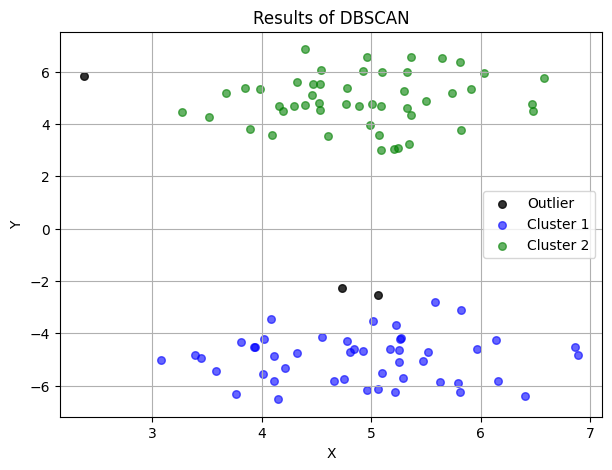

In [247]:
#################### DATASET 1 ####################
eps = 1
min_pts = 5

d = datasets[0]

print(f"run DBSCAN on dataset: 1")
        
points = d[['x', 'y']].to_numpy()

labels = DBSCAN(points, eps=eps, min_pts=min_pts)

d['cluster'] = labels

plot_dbscan_results(d)

run DBSCAN on dataset: 2


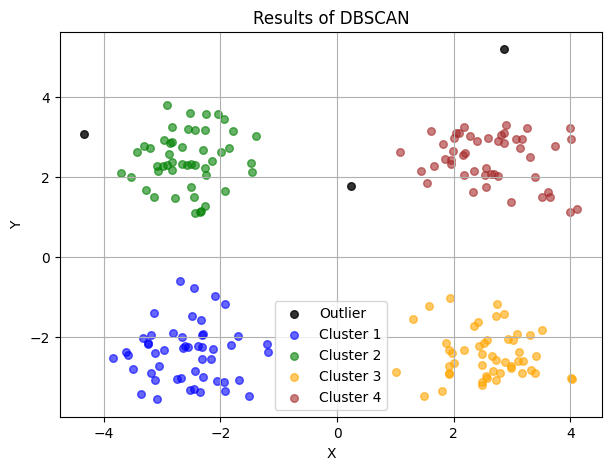

In [248]:
#################### DATASET 2 ####################
eps = 1
min_pts = 5

d = datasets[1]

print(f"run DBSCAN on dataset: 2")
        
points = d[['x', 'y']].to_numpy()

labels = DBSCAN(points, eps=eps, min_pts=min_pts)

d['cluster'] = labels

plot_dbscan_results(d)

run DBSCAN on dataset: 3


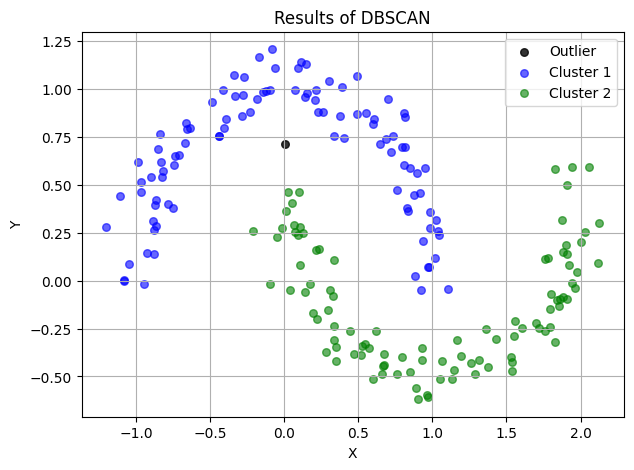

In [249]:
#################### DATASET 3 ####################
eps = 0.2
min_pts = 3

d = datasets[2]

print(f"run DBSCAN on dataset: 3")
        
points = d[['x', 'y']].to_numpy()

labels = DBSCAN(points, eps=eps, min_pts=min_pts)

d['cluster'] = labels

plot_dbscan_results(d)

run DBSCAN on dataset: 4


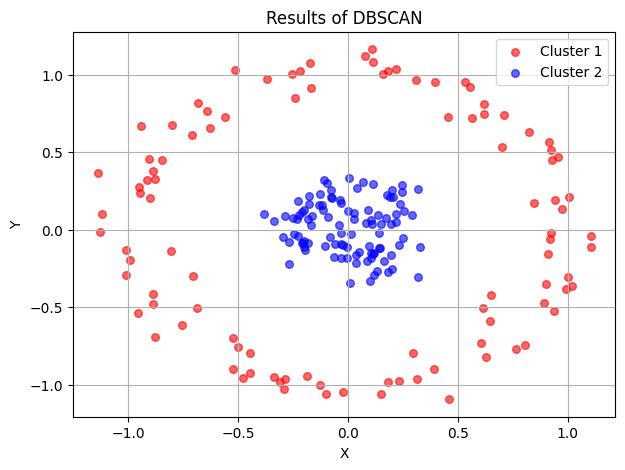

In [250]:
#################### DATASET 4 ####################
eps = 0.3
min_pts = 5

d = datasets[3]

print(f"run DBSCAN on dataset: 4")
        
points = d[['x', 'y']].to_numpy()

labels = DBSCAN(points, eps=eps, min_pts=min_pts)

d['cluster'] = labels

plot_dbscan_results(d)

run DBSCAN on dataset: 5


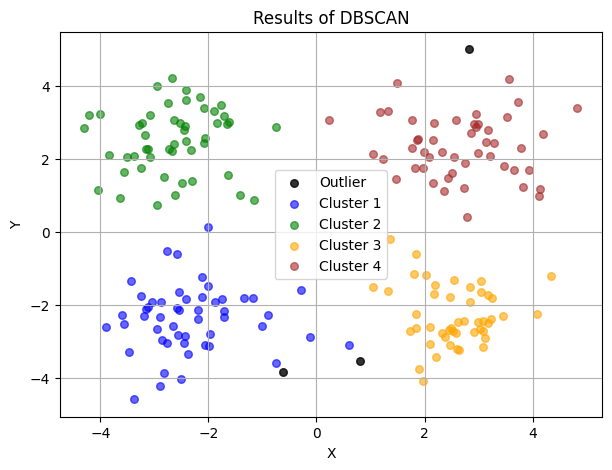

In [251]:
#################### DATASET 5 ####################
eps = 1.1
min_pts = 5

d = datasets[4]

print(f"run DBSCAN on dataset: 5")
        
points = d[['x', 'y']].to_numpy()

labels = DBSCAN(points, eps=eps, min_pts=min_pts)

d['cluster'] = labels

plot_dbscan_results(d)

## 4. část - Porovnání s výstupem z knihovny

Porovnejte výstup s výstupem z knihovny sklearn. Dokumentaci naleznete [zde](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html).

In [ ]:
from sklearn.cluster import DBSCAN